DETERMINISTIC ENVIRONMENT

In [172]:
! pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [173]:
import numpy as np
import gym
from gym import spaces
import random
import matplotlib.pyplot as plt
from google.colab import widgets
import time

In [174]:
grid = np.zeros((5, 5))
print(grid)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [175]:
pos1 = [0, 0]
pos2 = [4, 1]

In [176]:
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.8

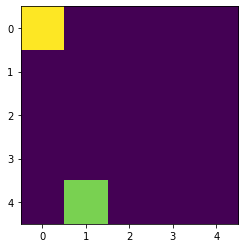

In [249]:
#plt.grid(ls="dashed", lw=1, c="r")
plt.imshow(grid)

In [217]:
class GridEnvironment1(gym.Env):
    
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(8)
        self.max_timesteps = 5
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [4, 1]
        self.state = np.zeros((5, 5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.8
        observation = self.state.flatten()
        
        return observation
    
    def step(self, action):
        self.state = np.random.choice(self.observation_space.n)
        p=round(random.random(),1)
        x=self.agent_pos[0]
        y=self.agent_pos[1]
        if action == 0:
            self.agent_pos[0] -=1
        if action == 1:
          self.agent_pos[0] += 1
        if action == 2:
          self.agent_pos[1] += 1
        if action == 3:
          self.agent_pos[1] -= 1
        if action == 4:
          self.agent_pos[0] -= 1
          self.agent_pos[1] += 1
        if action == 5:
          self.agent_pos[0] += 1
          self.agent_pos[1] += 1
        if action == 6:
          self.agent_pos[0] += 1
          self.agent_pos[1] -= 1
        if action == 7:
          self.agent_pos[0] -= 1
          self.agent_pos[1] -= 1
      
        if(self.agent_pos[0]<0 or self.agent_pos[0]>4 or self.agent_pos[1]<0 or self.agent_pos[1]>4):
           self.agent_pos[0]=x
           self.agent_pos[1]=y
        self.state = np.zeros((5,5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.8
        observation = self.state.flatten()

        reward=0
        if (self.agent_pos == self.goal_pos):
            reward = 10

        if (self.agent_pos == [2,3]):
            reward = 1
       
        if (self.agent_pos == [3,3]):
            reward = 2
       
        if (self.agent_pos == [1,1]):
            reward = -5
            
        self.timestep +=1
        done = True if self.timestep >= self.max_timesteps else False
        
        info = {}
        
        return observation, reward, done, info
    
    def render(self):
        plt.imshow(self.state)
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0


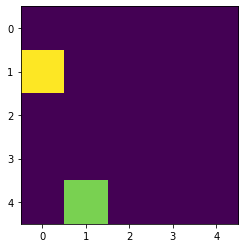

<IPython.core.display.Javascript object>

In [252]:
env1 = GridEnvironment1()
agent = RandomAgent(env1)

obs1 = env1.reset()
done=False

output_grid = widgets.Grid(1,1)
with output_grid.output_to(0,0):
 env1.render()

while not done:
 action= agent.step(obs1)
 obs, reward, done, info= env1.step(action)
with output_grid.output_to(0,0):
   output_grid.clear_cell()
   env1.render()
   print(reward)
   time.sleep(1)

-5


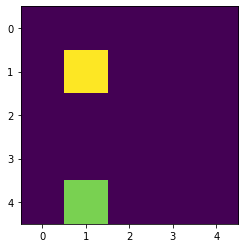

In [243]:
action = 5
observation, reward, done, _ = env1.step(action)
env1.render()
print(reward)

STOCHASTIC ENVIRONMENT

In [187]:
import numpy as np
import gym
from gym import spaces
import random
import matplotlib.pyplot as plt
from google.colab import widgets
import time

In [188]:
grid = np.zeros((5, 5))
print(grid)


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [189]:
pos1 = [0, 0]
pos2 = [4, 1]

In [190]:
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.8

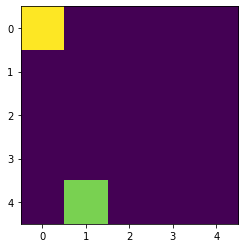

In [191]:
plt.imshow(grid)

In [192]:
class GridEnvironment1(gym.Env):
    
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(8)
        self.max_timesteps = 5
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [4, 1]
        self.state = np.zeros((5, 5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.8
        observation = self.state.flatten()
        
        return observation
    
    def step(self, action):
        self.state = np.random.choice(self.observation_space.n)
        p=round(random.random(),1)
        x=self.agent_pos[0]
        y=self.agent_pos[1]
        if action == 0:
          if p>0.9:
            self.agent_pos[0] +=1
          else:
            self.agent_pos[0] -=1
        if action == 1:
          self.agent_pos[0] += 1
        if action == 2:
          self.agent_pos[1] += 1
        if action == 3:
          self.agent_pos[1] -= 1
        if action == 4:
          self.agent_pos[0] -= 1
          self.agent_pos[1] += 1
        if action == 5:
          self.agent_pos[0] += 1
          self.agent_pos[1] += 1
        if action == 6:
          self.agent_pos[0] += 1
          self.agent_pos[1] -= 1
        if action == 7:
          self.agent_pos[0] -= 1
          self.agent_pos[1] -= 1
      
        if(self.agent_pos[0]<0 or self.agent_pos[0]>4 or self.agent_pos[1]<0 or self.agent_pos[1]>4):
           self.agent_pos[0]=x
           self.agent_pos[1]=y
        self.state = np.zeros((5,5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.8
        observation = self.state.flatten()

        reward=0
        if (self.agent_pos == self.goal_pos):
            reward = 10

        if (self.agent_pos == [2,3]):
            reward = 1
       
        if (self.agent_pos == [3,3]):
            reward = 2
       
        if (self.agent_pos == [1,1]):
            reward = -5
            
        self.timestep +=1
        done = True if self.timestep >= self.max_timesteps else False
        
        info = {}
        
        return observation, reward, done, info
    
    def render(self):
        plt.imshow(self.state)
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0


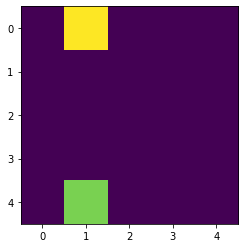

<IPython.core.display.Javascript object>

In [193]:
env1 = GridEnvironment1()
agent = RandomAgent(env1)

obs1 = env1.reset()
done=False

output_grid = widgets.Grid(1,1)
with output_grid.output_to(0,0):
 env1.render()

while not done:
 action= agent.step(obs1)
 obs, reward, done, info= env1.step(action)
with output_grid.output_to(0,0):
   output_grid.clear_cell()
   env1.render()
   print(reward)
   time.sleep(1)

0


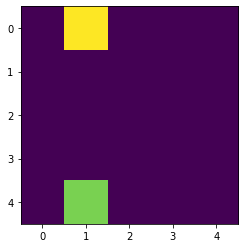

In [194]:
action = 0
observation, reward, done, _ = env1.step(action)
env1.render()
print(reward)

In [195]:
r= round(random.random(),1)
print(r)

0.5
